<a href="https://colab.research.google.com/github/SuhaasAdiraju/NeuromatchAcademy2023_SSA/blob/main/all_stars/suhaas/ExploringNMADataset_Stringer_Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Get numpy in as np for ease
import numpy as np
#Get matplotlib for plotting
import matplotlib.pyplot as plt

# @title Data retrieval
import os, requests

fname = "stringer_spontaneous.npy"
url = "https://osf.io/dpqaj/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

# @title Data loading

dat = np.load('stringer_spontaneous.npy', allow_pickle=True).item()


# Explore/Understand the data set


In [ ]:
print(dat.keys())



dict_keys(['sresp', 'run', 'beh_svd_time', 'beh_svd_mask', 'stat', 'pupilArea', 'pupilCOM', 'xyz'])


# Neural Data

In [ ]:
# Isolate the neuronal activity
TimeBinnedNeuronal = dat['sresp'];

# make a time axis
timeax1Full = np.linspace(0,len(TimeBinnedNeuronal[1,:])/1.2, len(TimeBinnedNeuronal[1,:]))
for neuron in range(0,3):
  plt.plot(timeax1Full, TimeBinnedNeuronal[neuron,:])


# Behavioral Data


IndexError: ignored

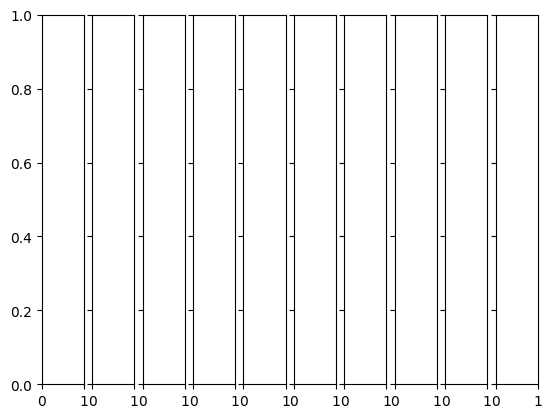

In [43]:
Masks = dat['beh_svd_mask'];
MaskTimes = dat['beh_svd_time'];
np.shape(Masks)

rows = 1; cols = 10;
fig, ax = plt.subplots(rows,cols,sharex= True, sharey= True, squeeze = False)
for idx in range(0,1000,100):
  for coli in range(cols):
    ax[rows,coli].imshow(Masks[:,:,idx])

fig.show()